In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras_visualizer import visualizer



In [53]:
# generate data set
t_start = 0
t_end = 10
t_steps = 10
t_range = np.linspace(t_start,t_end,t_steps)
seq = np.array([np.sin(2*np.pi*t/10) for t in t_range])
[print(num) for num in enumerate(seq)]
#In order to create training data for predicting the next value of the sine function based on the current value,
#generate n pairs of two-point sequences from the values in seq.
n_training_data_pairs = 100
x_train = np.array([])
y_train = np.array([])
for i in range(n_training_data_pairs):
    rand = np.random.randint(t_steps)
    x_train = np.append(x_train, seq[rand])
    y_train = np.append(y_train, seq[np.mod(rand + 1,t_steps)])
x_test = np.array(seq)
y_test = np.array(np.roll(seq, -1))

pdata = pd.DataFrame({'x':x_train,'y':y_train})
print(pdata)



(0, 0.0)
(1, 0.6427876096865393)
(2, 0.984807753012208)
(3, 0.8660254037844386)
(4, 0.3420201433256689)
(5, -0.3420201433256682)
(6, -0.8660254037844388)
(7, -0.9848077530122081)
(8, -0.6427876096865396)
(9, -2.4492935982947064e-16)
               x             y
0  -6.427876e-01 -2.449294e-16
1  -9.848078e-01 -6.427876e-01
2  -9.848078e-01 -6.427876e-01
3  -2.449294e-16  0.000000e+00
4   0.000000e+00  6.427876e-01
..           ...           ...
95 -9.848078e-01 -6.427876e-01
96  6.427876e-01  9.848078e-01
97  8.660254e-01  3.420201e-01
98  8.660254e-01  3.420201e-01
99  3.420201e-01 -3.420201e-01

[100 rows x 2 columns]


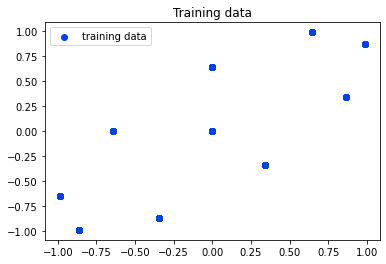

In [54]:
#Create a scatter plot of the generated points
plt.scatter(pdata['x'],pdata['y'], color='xkcd:blue', marker='o', label='training data')
plt.title('Training data')
plt.legend()
plt.show()


In [55]:
# Create a Dense, Sequential model with a single layer of 10 neurons.
def build_model():
    model = keras.Sequential([
        layers.Dense(10, activation='relu', input_shape=[1]),
        #layers.Dense(20, activation='relu'),
        #layers.Dense(10, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model

model = build_model()

# Display info for the model - total number of parameters trained per layer.
model.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(model, to_file='model_visual.png')
visualizer(model,format='png', view=True)


Epoch 1/1000
1/1 [==============================] - 0s 141ms/step - loss: 0.9274 - accuracy: 0.0875 - val_loss: 0.8673 - val_accuracy: 0.1500
Epoch 2/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.9210 - accuracy: 0.0875 - val_loss: 0.8607 - val_accuracy: 0.1500
Epoch 3/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.9147 - accuracy: 0.0875 - val_loss: 0.8542 - val_accuracy: 0.1500
Epoch 4/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.9084 - accuracy: 0.0875 - val_loss: 0.8477 - val_accuracy: 0.1500
Epoch 5/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.9021 - accuracy: 0.0875 - val_loss: 0.8413 - val_accuracy: 0.1500
Epoch 6/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8959 - accuracy: 0.0875 - val_loss: 0.8349 - val_accuracy: 0.1500
Epoch 7/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.8897 - accuracy: 0.0875 - val_loss: 0.8285 - val_accuracy: 0.1500
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.6257 - accuracy: 0.0875 - val_loss: 0.5603 - val_accuracy: 0.1500
Epoch 60/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.6216 - accuracy: 0.0875 - val_loss: 0.5563 - val_accuracy: 0.1500
Epoch 61/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.6175 - accuracy: 0.0875 - val_loss: 0.5522 - val_accuracy: 0.1500
Epoch 62/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6134 - accuracy: 0.0875 - val_loss: 0.5482 - val_accuracy: 0.1500
Epoch 63/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6094 - accuracy: 0.0875 - val_loss: 0.5442 - val_accuracy: 0.1500
Epoch 64/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.6054 - accuracy: 0.0875 - val_loss: 0.5403 - val_accuracy: 0.1500
Epoch 65/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.6015 - accuracy: 0.0875 - val_loss: 0.5364 - val_accuracy: 0.1500
Epoch 

1/1 [==============================] - 0s 21ms/step - loss: 0.4336 - accuracy: 0.0875 - val_loss: 0.3777 - val_accuracy: 0.1500
Epoch 117/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4310 - accuracy: 0.0875 - val_loss: 0.3754 - val_accuracy: 0.1500
Epoch 118/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4284 - accuracy: 0.0875 - val_loss: 0.3731 - val_accuracy: 0.1500
Epoch 119/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.4258 - accuracy: 0.0875 - val_loss: 0.3707 - val_accuracy: 0.1500
Epoch 120/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4233 - accuracy: 0.0875 - val_loss: 0.3685 - val_accuracy: 0.1500
Epoch 121/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.4208 - accuracy: 0.0875 - val_loss: 0.3662 - val_accuracy: 0.1500
Epoch 122/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.4183 - accuracy: 0.0875 - val_loss: 0.3639 - val_accuracy: 0.1500
Epoch 123/1000

1/1 [==============================] - 0s 21ms/step - loss: 0.3155 - accuracy: 0.0875 - val_loss: 0.2779 - val_accuracy: 0.1500
Epoch 174/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.3139 - accuracy: 0.0875 - val_loss: 0.2768 - val_accuracy: 0.1500
Epoch 175/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3124 - accuracy: 0.0875 - val_loss: 0.2757 - val_accuracy: 0.1500
Epoch 176/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3110 - accuracy: 0.0875 - val_loss: 0.2746 - val_accuracy: 0.1500
Epoch 177/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3095 - accuracy: 0.0875 - val_loss: 0.2736 - val_accuracy: 0.1500
Epoch 178/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3080 - accuracy: 0.0875 - val_loss: 0.2725 - val_accuracy: 0.1500
Epoch 179/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.3066 - accuracy: 0.0875 - val_loss: 0.2715 - val_accuracy: 0.1500
Epoch 180/1000

1/1 [==============================] - 0s 16ms/step - loss: 0.2500 - accuracy: 0.0875 - val_loss: 0.2307 - val_accuracy: 0.1500
Epoch 231/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.2492 - accuracy: 0.0875 - val_loss: 0.2302 - val_accuracy: 0.1500
Epoch 232/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2484 - accuracy: 0.0875 - val_loss: 0.2296 - val_accuracy: 0.1500
Epoch 233/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2477 - accuracy: 0.0875 - val_loss: 0.2291 - val_accuracy: 0.1500
Epoch 234/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.2469 - accuracy: 0.0875 - val_loss: 0.2286 - val_accuracy: 0.1500
Epoch 235/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2462 - accuracy: 0.0875 - val_loss: 0.2281 - val_accuracy: 0.1500
Epoch 236/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2455 - accuracy: 0.0875 - val_loss: 0.2275 - val_accuracy: 0.1500
Epoch 237/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.2190 - accuracy: 0.0875 - val_loss: 0.2084 - val_accuracy: 0.1500
Epoch 288/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.2186 - accuracy: 0.0875 - val_loss: 0.2081 - val_accuracy: 0.1500
Epoch 289/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2183 - accuracy: 0.0875 - val_loss: 0.2079 - val_accuracy: 0.1500
Epoch 290/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2179 - accuracy: 0.0875 - val_loss: 0.2076 - val_accuracy: 0.1500
Epoch 291/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2176 - accuracy: 0.0875 - val_loss: 0.2074 - val_accuracy: 0.1500
Epoch 292/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2172 - accuracy: 0.0875 - val_loss: 0.2071 - val_accuracy: 0.1500
Epoch 293/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2169 - accuracy: 0.0875 - val_loss: 0.2069 - val_accuracy: 0.1500
Epoch 294/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.2056 - accuracy: 0.0875 - val_loss: 0.1979 - val_accuracy: 0.1500
Epoch 345/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2054 - accuracy: 0.0875 - val_loss: 0.1978 - val_accuracy: 0.1500
Epoch 346/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.2053 - accuracy: 0.0875 - val_loss: 0.1976 - val_accuracy: 0.1500
Epoch 347/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.2052 - accuracy: 0.0875 - val_loss: 0.1975 - val_accuracy: 0.1500
Epoch 348/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2050 - accuracy: 0.0875 - val_loss: 0.1974 - val_accuracy: 0.1500
Epoch 349/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.2049 - accuracy: 0.0875 - val_loss: 0.1973 - val_accuracy: 0.1500
Epoch 350/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.2047 - accuracy: 0.0875 - val_loss: 0.1972 - val_accuracy: 0.1500
Epoch 351/1000

1/1 [==============================] - 0s 16ms/step - loss: 0.1993 - accuracy: 0.0875 - val_loss: 0.1938 - val_accuracy: 0.1500
Epoch 402/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1993 - accuracy: 0.0875 - val_loss: 0.1937 - val_accuracy: 0.1500
Epoch 403/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1992 - accuracy: 0.0875 - val_loss: 0.1937 - val_accuracy: 0.1500
Epoch 404/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.1991 - accuracy: 0.0875 - val_loss: 0.1937 - val_accuracy: 0.1500
Epoch 405/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1990 - accuracy: 0.0875 - val_loss: 0.1937 - val_accuracy: 0.1500
Epoch 406/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1989 - accuracy: 0.0875 - val_loss: 0.1936 - val_accuracy: 0.1500
Epoch 407/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1989 - accuracy: 0.0875 - val_loss: 0.1936 - val_accuracy: 0.1500
Epoch 408/1000

1/1 [==============================] - 0s 15ms/step - loss: 0.1951 - accuracy: 0.0875 - val_loss: 0.1926 - val_accuracy: 0.1500
Epoch 459/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1950 - accuracy: 0.0875 - val_loss: 0.1926 - val_accuracy: 0.1500
Epoch 460/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1950 - accuracy: 0.0875 - val_loss: 0.1926 - val_accuracy: 0.1500
Epoch 461/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1949 - accuracy: 0.0875 - val_loss: 0.1926 - val_accuracy: 0.1500
Epoch 462/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1948 - accuracy: 0.0875 - val_loss: 0.1926 - val_accuracy: 0.1500
Epoch 463/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1947 - accuracy: 0.0875 - val_loss: 0.1926 - val_accuracy: 0.1500
Epoch 464/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1947 - accuracy: 0.0875 - val_loss: 0.1925 - val_accuracy: 0.1500
Epoch 465/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1926 - accuracy: 0.0875 - val_loss: 0.1937 - val_accuracy: 0.1500
Epoch 516/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1926 - accuracy: 0.0875 - val_loss: 0.1938 - val_accuracy: 0.1500
Epoch 517/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1925 - accuracy: 0.0875 - val_loss: 0.1938 - val_accuracy: 0.1500
Epoch 518/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1925 - accuracy: 0.0875 - val_loss: 0.1938 - val_accuracy: 0.1500
Epoch 519/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1925 - accuracy: 0.0875 - val_loss: 0.1938 - val_accuracy: 0.1500
Epoch 520/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1924 - accuracy: 0.0875 - val_loss: 0.1938 - val_accuracy: 0.1500
Epoch 521/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1924 - accuracy: 0.0875 - val_loss: 0.1938 - val_accuracy: 0.1500
Epoch 522/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.1907 - accuracy: 0.0875 - val_loss: 0.1945 - val_accuracy: 0.1500
Epoch 573/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1906 - accuracy: 0.0875 - val_loss: 0.1946 - val_accuracy: 0.1500
Epoch 574/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1906 - accuracy: 0.0875 - val_loss: 0.1946 - val_accuracy: 0.1500
Epoch 575/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1906 - accuracy: 0.0875 - val_loss: 0.1946 - val_accuracy: 0.1500
Epoch 576/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1905 - accuracy: 0.0875 - val_loss: 0.1946 - val_accuracy: 0.1500
Epoch 577/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1905 - accuracy: 0.0875 - val_loss: 0.1947 - val_accuracy: 0.1500
Epoch 578/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1905 - accuracy: 0.0875 - val_loss: 0.1947 - val_accuracy: 0.1500
Epoch 579/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1894 - accuracy: 0.0875 - val_loss: 0.1955 - val_accuracy: 0.1500
Epoch 630/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1893 - accuracy: 0.0875 - val_loss: 0.1955 - val_accuracy: 0.1500
Epoch 631/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1893 - accuracy: 0.0875 - val_loss: 0.1955 - val_accuracy: 0.1500
Epoch 632/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1893 - accuracy: 0.0875 - val_loss: 0.1955 - val_accuracy: 0.1500
Epoch 633/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1893 - accuracy: 0.0875 - val_loss: 0.1955 - val_accuracy: 0.1500
Epoch 634/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1892 - accuracy: 0.0875 - val_loss: 0.1955 - val_accuracy: 0.1500
Epoch 635/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1892 - accuracy: 0.0875 - val_loss: 0.1955 - val_accuracy: 0.1500
Epoch 636/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.1884 - accuracy: 0.0875 - val_loss: 0.1963 - val_accuracy: 0.1500
Epoch 687/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1884 - accuracy: 0.0875 - val_loss: 0.1963 - val_accuracy: 0.1500
Epoch 688/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1884 - accuracy: 0.0875 - val_loss: 0.1963 - val_accuracy: 0.1500
Epoch 689/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1884 - accuracy: 0.0875 - val_loss: 0.1963 - val_accuracy: 0.1500
Epoch 690/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1884 - accuracy: 0.0875 - val_loss: 0.1963 - val_accuracy: 0.1500
Epoch 691/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1884 - accuracy: 0.0875 - val_loss: 0.1963 - val_accuracy: 0.1500
Epoch 692/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1884 - accuracy: 0.0875 - val_loss: 0.1963 - val_accuracy: 0.1500
Epoch 693/1000

1/1 [==============================] - 0s 19ms/step - loss: 0.1878 - accuracy: 0.0875 - val_loss: 0.1965 - val_accuracy: 0.1500
Epoch 744/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1878 - accuracy: 0.0875 - val_loss: 0.1965 - val_accuracy: 0.1500
Epoch 745/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1878 - accuracy: 0.0875 - val_loss: 0.1965 - val_accuracy: 0.1500
Epoch 746/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1878 - accuracy: 0.0875 - val_loss: 0.1965 - val_accuracy: 0.1500
Epoch 747/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1878 - accuracy: 0.0875 - val_loss: 0.1965 - val_accuracy: 0.1500
Epoch 748/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1877 - accuracy: 0.0875 - val_loss: 0.1964 - val_accuracy: 0.1500
Epoch 749/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1877 - accuracy: 0.0875 - val_loss: 0.1964 - val_accuracy: 0.1500
Epoch 750/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.1872 - accuracy: 0.0875 - val_loss: 0.1965 - val_accuracy: 0.1500
Epoch 801/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1872 - accuracy: 0.0875 - val_loss: 0.1965 - val_accuracy: 0.1500
Epoch 802/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1871 - accuracy: 0.0875 - val_loss: 0.1965 - val_accuracy: 0.1500
Epoch 803/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1871 - accuracy: 0.0875 - val_loss: 0.1964 - val_accuracy: 0.1500
Epoch 804/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1871 - accuracy: 0.0875 - val_loss: 0.1964 - val_accuracy: 0.1500
Epoch 805/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1871 - accuracy: 0.0875 - val_loss: 0.1964 - val_accuracy: 0.1500
Epoch 806/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.1871 - accuracy: 0.0875 - val_loss: 0.1964 - val_accuracy: 0.1500
Epoch 807/1000

1/1 [==============================] - 0s 19ms/step - loss: 0.1865 - accuracy: 0.0875 - val_loss: 0.1962 - val_accuracy: 0.1500
Epoch 858/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1865 - accuracy: 0.0875 - val_loss: 0.1962 - val_accuracy: 0.1500
Epoch 859/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1865 - accuracy: 0.0875 - val_loss: 0.1962 - val_accuracy: 0.1500
Epoch 860/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1865 - accuracy: 0.0875 - val_loss: 0.1962 - val_accuracy: 0.1500
Epoch 861/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1865 - accuracy: 0.0875 - val_loss: 0.1962 - val_accuracy: 0.1500
Epoch 862/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1865 - accuracy: 0.0875 - val_loss: 0.1962 - val_accuracy: 0.1500
Epoch 863/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.1864 - accuracy: 0.0875 - val_loss: 0.1962 - val_accuracy: 0.1500
Epoch 864/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.1858 - accuracy: 0.0875 - val_loss: 0.1957 - val_accuracy: 0.1500
Epoch 915/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1858 - accuracy: 0.0875 - val_loss: 0.1957 - val_accuracy: 0.1500
Epoch 916/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1858 - accuracy: 0.0875 - val_loss: 0.1957 - val_accuracy: 0.1500
Epoch 917/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1858 - accuracy: 0.0875 - val_loss: 0.1957 - val_accuracy: 0.1500
Epoch 918/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1858 - accuracy: 0.0875 - val_loss: 0.1956 - val_accuracy: 0.1500
Epoch 919/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1858 - accuracy: 0.0875 - val_loss: 0.1956 - val_accuracy: 0.1500
Epoch 920/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1857 - accuracy: 0.0875 - val_loss: 0.1956 - val_accuracy: 0.1500
Epoch 921/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.1851 - accuracy: 0.0875 - val_loss: 0.1950 - val_accuracy: 0.1500
Epoch 972/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1851 - accuracy: 0.0875 - val_loss: 0.1950 - val_accuracy: 0.1500
Epoch 973/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1851 - accuracy: 0.0875 - val_loss: 0.1950 - val_accuracy: 0.1500
Epoch 974/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1851 - accuracy: 0.0875 - val_loss: 0.1950 - val_accuracy: 0.1500
Epoch 975/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1850 - accuracy: 0.0875 - val_loss: 0.1950 - val_accuracy: 0.1500
Epoch 976/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1850 - accuracy: 0.0875 - val_loss: 0.1949 - val_accuracy: 0.1500
Epoch 977/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.1850 - accuracy: 0.0875 - val_loss: 0.1949 - val_accuracy: 0.1500
Epoch 978/1000

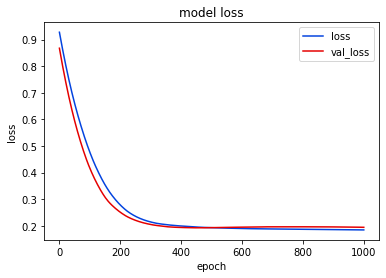

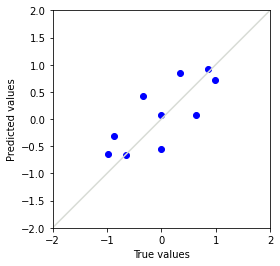

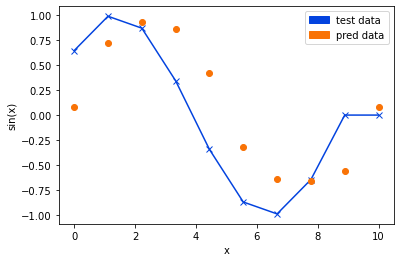

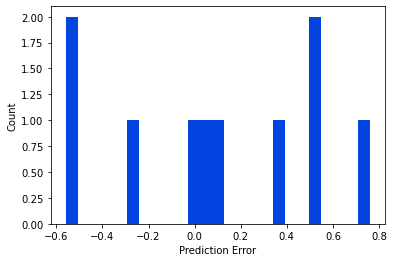

In [56]:
#train model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=100)

#Review the training progress and performance
#View the model's (historical) training progress via the history object
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

#plot training history
plt.plot(history.history['loss'], color='xkcd:blue')
plt.plot(history.history['val_loss'], color='xkcd:red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

#predict values using data in the test set
y_pred = model.predict(x_test, batch_size=10).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, color='blue')
_ = plt.plot([-2,2], [-2,2], color='xkcd:light grey')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

#Visualize the predicted value versus the training (ie. true) values.
plot_test = plt.plot(t_range, y_test,'x-', color='xkcd:blue', label='y_test')
plot_pred = plt.plot(t_range,y_pred,'o', color='xkcd:orange', label='y_pred')
plt.xlabel('x')
plt.ylabel('sin(x)')
test_patch = mpatches.Patch(color='xkcd:blue', label='test data')
pred_patch = mpatches.Patch(color='xkcd:orange', label='pred data')
plt.legend(handles = [test_patch, pred_patch])
plt.show()

#Take a look at the error distribution.
error = y_pred - y_test
plt.hist(error, bins = 25, color='xkcd:blue')
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [75]:
# Normalize

pdata.describe()

,x,y
count,1.000000e+02,1.000000e+02
mean,-9.140359e-02,-2.100997e-02
std,6.410552e-01,7.119836e-01
min,-9.848078e-01,-9.848078e-01
25%,-6.427876e-01,-6.427876e-01
50%,-2.449294e-16,-2.449294e-16
75%,4.172120e-01,6.427876e-01
max,9.848078e-01,9.848078e-01


In [76]:
train_dataset = pdata.sample(frac=0.9,random_state=0)
test_dataset = pdata.drop(train_dataset.index)

In [77]:
# Create statistics for Train 
train_dataset.describe()

,x,y
count,9.000000e+01,9.000000e+01
mean,-1.019626e-01,-4.406841e-02
std,6.445755e-01,6.907555e-01
min,-9.848078e-01,-9.848078e-01
25%,-6.427876e-01,-6.427876e-01
50%,-2.449294e-16,-2.449294e-16
75%,3.420201e-01,6.427876e-01
max,9.848078e-01,9.848078e-01


In [78]:
# Create statistics for Test
test_dataset.describe()

,x,y
count,10.000000,10.000000
mean,0.003628,0.186516
std,0.633015,0.896963
min,-0.984808,-0.984808
25%,-0.342020,-0.810216
50%,0.000000,0.642788
75%,0.642788,0.984808
max,0.642788,0.984808


In [79]:
train_labels = train_dataset.loc[:, 'y']
train_feature = train_dataset.loc[:, 'x']

test_labels = test_dataset.loc[:, 'y']
test_feature = test_dataset.loc[:, 'x']

In [80]:

# Describe a function to normalize the data in a way (mean removal and variance scaling).
def norm(df, df_stats):
  return (df - df_stats.loc['mean']) / df_stats.loc['std']


In [91]:
# Describe a function to normalize the data in a way (mean removal and variance scaling).
def norm2(df, df_stats):
  return (df - df_stats.loc['min']) / (df_stats.loc['max'] - df_stats.loc['min'])

In [81]:
# Gather statistical information on the strain and test data
train_labels_stats = train_labels.describe()
train_feature_stats = train_feature.describe()

test_labels_stats = train_labels.describe()
test_feature_stats = train_feature.describe()


In [82]:
# Apply the normalization as defined in our function
normed_train_labels = norm(train_labels, train_labels_stats)
normed_train_feature = norm(train_feature, train_feature_stats)

normed_test_labels = norm(test_labels, test_labels_stats)
normed_test_feature = norm(test_feature, test_feature_stats)


In [92]:
normed_train_labels2 = norm2(train_labels, train_labels_stats)
normed_train_feature2 = norm2(train_feature, train_feature_stats)

normed_test_labels2 = norm2(test_labels, test_labels_stats)
normed_test_feature2 = norm2(test_feature, test_feature_stats)

In [83]:
# Inspect the results of the normalization
#normed_train_labels.describe()
normed_train_feature.describe()

count    9.000000e+01
mean    -2.467162e-17
std      1.000000e+00
min     -1.369654e+00
25%     -8.390406e-01
50%      1.581857e-01
75%      6.887987e-01
max      1.686025e+00
Name: x, dtype: float64

In [93]:
# Inspect the results of the normalization
#normed_train_labels.describe()
normed_train_feature2.describe()

count    90.000000
mean      0.448232
std       0.327260
min       0.000000
25%       0.173648
50%       0.500000
75%       0.673648
max       1.000000
Name: x, dtype: float64

In [84]:
# For Normalized data - Create a Dense, Sequential model with a single layer of 10 neurons.
def build_model(df_training):
    model = keras.Sequential([
        layers.Dense(10, activation='relu', input_shape=[1]),
        #layers.Dense(20, activation='relu'),
        #layers.Dense(10, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model


normed_model = build_model(normed_train_feature)
normed_model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [94]:
# For Normalized data - Create a Dense, Sequential model with a single layer of 10 neurons.
normed_model2 = build_model(normed_train_feature2)
normed_model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [85]:
#train Normed model
normed_history = normed_model.fit(normed_train_feature.to_numpy(), normed_train_labels.to_numpy(), validation_split=0.2, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 144ms/step - loss: 1.6824 - accuracy: 0.0000e+00 - val_loss: 1.6984 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.6702 - accuracy: 0.0000e+00 - val_loss: 1.6849 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6582 - accuracy: 0.0000e+00 - val_loss: 1.6718 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6467 - accuracy: 0.0000e+00 - val_loss: 1.6591 - val_accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 22ms/step - loss: 1.6358 - accuracy: 0.0000e+00 - val_loss: 1.6465 - val_accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 24ms/step - loss: 1.6250 - accuracy: 0.0000e+00 - val_loss: 1.6340 - val_accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.6143 - accuracy: 0.0000e+00 - 

Epoch 56/1000
1/1 [==============================] - 0s 17ms/step - loss: 1.1863 - accuracy: 0.0000e+00 - val_loss: 1.1271 - val_accuracy: 0.0000e+00
Epoch 57/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.1793 - accuracy: 0.0000e+00 - val_loss: 1.1191 - val_accuracy: 0.0000e+00
Epoch 58/1000
1/1 [==============================] - 0s 20ms/step - loss: 1.1724 - accuracy: 0.0000e+00 - val_loss: 1.1114 - val_accuracy: 0.0000e+00
Epoch 59/1000
1/1 [==============================] - 0s 16ms/step - loss: 1.1658 - accuracy: 0.0000e+00 - val_loss: 1.1038 - val_accuracy: 0.0000e+00
Epoch 60/1000
1/1 [==============================] - 0s 18ms/step - loss: 1.1592 - accuracy: 0.0000e+00 - val_loss: 1.0963 - val_accuracy: 0.0000e+00
Epoch 61/1000
1/1 [==============================] - 0s 19ms/step - loss: 1.1527 - accuracy: 0.0000e+00 - val_loss: 1.0889 - val_accuracy: 0.0000e+00
Epoch 62/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.1464 - accuracy: 0.0000e

1/1 [==============================] - 0s 18ms/step - loss: 0.9109 - accuracy: 0.0000e+00 - val_loss: 0.8155 - val_accuracy: 0.0000e+00
Epoch 111/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.9069 - accuracy: 0.0000e+00 - val_loss: 0.8111 - val_accuracy: 0.0000e+00
Epoch 112/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.9029 - accuracy: 0.0000e+00 - val_loss: 0.8067 - val_accuracy: 0.0000e+00
Epoch 113/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.8990 - accuracy: 0.0000e+00 - val_loss: 0.8023 - val_accuracy: 0.0000e+00
Epoch 114/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.8951 - accuracy: 0.0000e+00 - val_loss: 0.7980 - val_accuracy: 0.0000e+00
Epoch 115/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.8912 - accuracy: 0.0000e+00 - val_loss: 0.7938 - val_accuracy: 0.0000e+00
Epoch 116/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.8873 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 18ms/step - loss: 0.7445 - accuracy: 0.0000e+00 - val_loss: 0.6367 - val_accuracy: 0.0000e+00
Epoch 165/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.7424 - accuracy: 0.0000e+00 - val_loss: 0.6345 - val_accuracy: 0.0000e+00
Epoch 166/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.7403 - accuracy: 0.0000e+00 - val_loss: 0.6324 - val_accuracy: 0.0000e+00
Epoch 167/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.7382 - accuracy: 0.0000e+00 - val_loss: 0.6302 - val_accuracy: 0.0000e+00
Epoch 168/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.7362 - accuracy: 0.0000e+00 - val_loss: 0.6281 - val_accuracy: 0.0000e+00
Epoch 169/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.7341 - accuracy: 0.0000e+00 - val_loss: 0.6260 - val_accuracy: 0.0000e+00
Epoch 170/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.7321 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 16ms/step - loss: 0.6480 - accuracy: 0.0000e+00 - val_loss: 0.5481 - val_accuracy: 0.0000e+00
Epoch 219/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.6465 - accuracy: 0.0000e+00 - val_loss: 0.5469 - val_accuracy: 0.0000e+00
Epoch 220/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.6450 - accuracy: 0.0000e+00 - val_loss: 0.5458 - val_accuracy: 0.0000e+00
Epoch 221/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.6435 - accuracy: 0.0000e+00 - val_loss: 0.5446 - val_accuracy: 0.0000e+00
Epoch 222/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.6420 - accuracy: 0.0000e+00 - val_loss: 0.5435 - val_accuracy: 0.0000e+00
Epoch 223/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.6406 - accuracy: 0.0000e+00 - val_loss: 0.5424 - val_accuracy: 0.0000e+00
Epoch 224/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.6391 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 17ms/step - loss: 0.5786 - accuracy: 0.0000e+00 - val_loss: 0.5018 - val_accuracy: 0.0000e+00
Epoch 273/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.5775 - accuracy: 0.0000e+00 - val_loss: 0.5012 - val_accuracy: 0.0000e+00
Epoch 274/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.5764 - accuracy: 0.0000e+00 - val_loss: 0.5006 - val_accuracy: 0.0000e+00
Epoch 275/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5753 - accuracy: 0.0000e+00 - val_loss: 0.5000 - val_accuracy: 0.0000e+00
Epoch 276/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.5742 - accuracy: 0.0000e+00 - val_loss: 0.4995 - val_accuracy: 0.0000e+00
Epoch 277/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5731 - accuracy: 0.0000e+00 - val_loss: 0.4989 - val_accuracy: 0.0000e+00
Epoch 278/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5720 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 22ms/step - loss: 0.5240 - accuracy: 0.0000e+00 - val_loss: 0.4759 - val_accuracy: 0.0000e+00
Epoch 327/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.5231 - accuracy: 0.0000e+00 - val_loss: 0.4756 - val_accuracy: 0.0000e+00
Epoch 328/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.5222 - accuracy: 0.0000e+00 - val_loss: 0.4752 - val_accuracy: 0.0000e+00
Epoch 329/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.5213 - accuracy: 0.0000e+00 - val_loss: 0.4748 - val_accuracy: 0.0000e+00
Epoch 330/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.5204 - accuracy: 0.0000e+00 - val_loss: 0.4744 - val_accuracy: 0.0000e+00
Epoch 331/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5195 - accuracy: 0.0000e+00 - val_loss: 0.4741 - val_accuracy: 0.0000e+00
Epoch 332/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.5186 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 17ms/step - loss: 0.4827 - accuracy: 0.0000e+00 - val_loss: 0.4619 - val_accuracy: 0.0000e+00
Epoch 381/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.4820 - accuracy: 0.0000e+00 - val_loss: 0.4617 - val_accuracy: 0.0000e+00
Epoch 382/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.4813 - accuracy: 0.0000e+00 - val_loss: 0.4615 - val_accuracy: 0.0000e+00
Epoch 383/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4806 - accuracy: 0.0000e+00 - val_loss: 0.4613 - val_accuracy: 0.0000e+00
Epoch 384/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4799 - accuracy: 0.0000e+00 - val_loss: 0.4611 - val_accuracy: 0.0000e+00
Epoch 385/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4792 - accuracy: 0.0000e+00 - val_loss: 0.4608 - val_accuracy: 0.0000e+00
Epoch 386/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4785 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 36ms/step - loss: 0.4471 - accuracy: 0.0000e+00 - val_loss: 0.4502 - val_accuracy: 0.0000e+00
Epoch 435/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4465 - accuracy: 0.0000e+00 - val_loss: 0.4500 - val_accuracy: 0.0000e+00
Epoch 436/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4459 - accuracy: 0.0000e+00 - val_loss: 0.4498 - val_accuracy: 0.0000e+00
Epoch 437/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.4453 - accuracy: 0.0000e+00 - val_loss: 0.4496 - val_accuracy: 0.0000e+00
Epoch 438/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4447 - accuracy: 0.0000e+00 - val_loss: 0.4494 - val_accuracy: 0.0000e+00
Epoch 439/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.4442 - accuracy: 0.0000e+00 - val_loss: 0.4492 - val_accuracy: 0.0000e+00
Epoch 440/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4436 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 16ms/step - loss: 0.4181 - accuracy: 0.0000e+00 - val_loss: 0.4406 - val_accuracy: 0.0000e+00
Epoch 489/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.4177 - accuracy: 0.0000e+00 - val_loss: 0.4405 - val_accuracy: 0.0000e+00
Epoch 490/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.4172 - accuracy: 0.0000e+00 - val_loss: 0.4404 - val_accuracy: 0.0000e+00
Epoch 491/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.4167 - accuracy: 0.0000e+00 - val_loss: 0.4403 - val_accuracy: 0.0000e+00
Epoch 492/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4163 - accuracy: 0.0000e+00 - val_loss: 0.4401 - val_accuracy: 0.0000e+00
Epoch 493/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.4158 - accuracy: 0.0000e+00 - val_loss: 0.4400 - val_accuracy: 0.0000e+00
Epoch 494/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.4154 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 16ms/step - loss: 0.3972 - accuracy: 0.0000e+00 - val_loss: 0.4343 - val_accuracy: 0.0000e+00
Epoch 543/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3969 - accuracy: 0.0000e+00 - val_loss: 0.4342 - val_accuracy: 0.0000e+00
Epoch 544/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3966 - accuracy: 0.0000e+00 - val_loss: 0.4341 - val_accuracy: 0.0000e+00
Epoch 545/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3963 - accuracy: 0.0000e+00 - val_loss: 0.4340 - val_accuracy: 0.0000e+00
Epoch 546/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3960 - accuracy: 0.0000e+00 - val_loss: 0.4339 - val_accuracy: 0.0000e+00
Epoch 547/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3956 - accuracy: 0.0000e+00 - val_loss: 0.4338 - val_accuracy: 0.0000e+00
Epoch 548/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3953 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 20ms/step - loss: 0.3829 - accuracy: 0.0000e+00 - val_loss: 0.4281 - val_accuracy: 0.0000e+00
Epoch 597/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3827 - accuracy: 0.0000e+00 - val_loss: 0.4280 - val_accuracy: 0.0000e+00
Epoch 598/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.3825 - accuracy: 0.0000e+00 - val_loss: 0.4278 - val_accuracy: 0.0000e+00
Epoch 599/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3822 - accuracy: 0.0000e+00 - val_loss: 0.4277 - val_accuracy: 0.0000e+00
Epoch 600/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3820 - accuracy: 0.0000e+00 - val_loss: 0.4276 - val_accuracy: 0.0000e+00
Epoch 601/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3818 - accuracy: 0.0000e+00 - val_loss: 0.4274 - val_accuracy: 0.0000e+00
Epoch 602/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3816 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 18ms/step - loss: 0.3729 - accuracy: 0.0000e+00 - val_loss: 0.4211 - val_accuracy: 0.0000e+00
Epoch 651/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3728 - accuracy: 0.0000e+00 - val_loss: 0.4210 - val_accuracy: 0.0000e+00
Epoch 652/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3726 - accuracy: 0.0000e+00 - val_loss: 0.4209 - val_accuracy: 0.0000e+00
Epoch 653/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3725 - accuracy: 0.0000e+00 - val_loss: 0.4208 - val_accuracy: 0.0000e+00
Epoch 654/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3723 - accuracy: 0.0000e+00 - val_loss: 0.4206 - val_accuracy: 0.0000e+00
Epoch 655/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.3722 - accuracy: 0.0000e+00 - val_loss: 0.4206 - val_accuracy: 0.0000e+00
Epoch 656/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3721 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 18ms/step - loss: 0.3676 - accuracy: 0.0000e+00 - val_loss: 0.4188 - val_accuracy: 0.0000e+00
Epoch 705/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3676 - accuracy: 0.0000e+00 - val_loss: 0.4189 - val_accuracy: 0.0000e+00
Epoch 706/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3675 - accuracy: 0.0000e+00 - val_loss: 0.4189 - val_accuracy: 0.0000e+00
Epoch 707/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3675 - accuracy: 0.0000e+00 - val_loss: 0.4189 - val_accuracy: 0.0000e+00
Epoch 708/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.3674 - accuracy: 0.0000e+00 - val_loss: 0.4189 - val_accuracy: 0.0000e+00
Epoch 709/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3674 - accuracy: 0.0000e+00 - val_loss: 0.4189 - val_accuracy: 0.0000e+00
Epoch 710/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3673 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 20ms/step - loss: 0.3657 - accuracy: 0.0000e+00 - val_loss: 0.4179 - val_accuracy: 0.0000e+00
Epoch 759/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3657 - accuracy: 0.0000e+00 - val_loss: 0.4178 - val_accuracy: 0.0000e+00
Epoch 760/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3656 - accuracy: 0.0000e+00 - val_loss: 0.4178 - val_accuracy: 0.0000e+00
Epoch 761/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3656 - accuracy: 0.0000e+00 - val_loss: 0.4177 - val_accuracy: 0.0000e+00
Epoch 762/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3656 - accuracy: 0.0000e+00 - val_loss: 0.4177 - val_accuracy: 0.0000e+00
Epoch 763/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3655 - accuracy: 0.0000e+00 - val_loss: 0.4177 - val_accuracy: 0.0000e+00
Epoch 764/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3655 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 18ms/step - loss: 0.3644 - accuracy: 0.0000e+00 - val_loss: 0.4147 - val_accuracy: 0.0000e+00
Epoch 813/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3644 - accuracy: 0.0000e+00 - val_loss: 0.4146 - val_accuracy: 0.0000e+00
Epoch 814/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3644 - accuracy: 0.0000e+00 - val_loss: 0.4146 - val_accuracy: 0.0000e+00
Epoch 815/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3644 - accuracy: 0.0000e+00 - val_loss: 0.4145 - val_accuracy: 0.0000e+00
Epoch 816/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3644 - accuracy: 0.0000e+00 - val_loss: 0.4144 - val_accuracy: 0.0000e+00
Epoch 817/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3643 - accuracy: 0.0000e+00 - val_loss: 0.4144 - val_accuracy: 0.0000e+00
Epoch 818/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3643 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 16ms/step - loss: 0.3634 - accuracy: 0.0000e+00 - val_loss: 0.4108 - val_accuracy: 0.0000e+00
Epoch 867/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3634 - accuracy: 0.0000e+00 - val_loss: 0.4107 - val_accuracy: 0.0000e+00
Epoch 868/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3634 - accuracy: 0.0000e+00 - val_loss: 0.4107 - val_accuracy: 0.0000e+00
Epoch 869/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.3633 - accuracy: 0.0000e+00 - val_loss: 0.4106 - val_accuracy: 0.0000e+00
Epoch 870/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3633 - accuracy: 0.0000e+00 - val_loss: 0.4105 - val_accuracy: 0.0000e+00
Epoch 871/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3633 - accuracy: 0.0000e+00 - val_loss: 0.4105 - val_accuracy: 0.0000e+00
Epoch 872/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3633 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 17ms/step - loss: 0.3624 - accuracy: 0.0000e+00 - val_loss: 0.4067 - val_accuracy: 0.0000e+00
Epoch 921/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3624 - accuracy: 0.0000e+00 - val_loss: 0.4066 - val_accuracy: 0.0000e+00
Epoch 922/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3624 - accuracy: 0.0000e+00 - val_loss: 0.4066 - val_accuracy: 0.0000e+00
Epoch 923/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3624 - accuracy: 0.0000e+00 - val_loss: 0.4065 - val_accuracy: 0.0000e+00
Epoch 924/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3624 - accuracy: 0.0000e+00 - val_loss: 0.4064 - val_accuracy: 0.0000e+00
Epoch 925/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3624 - accuracy: 0.0000e+00 - val_loss: 0.4063 - val_accuracy: 0.0000e+00
Epoch 926/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3623 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 17ms/step - loss: 0.3615 - accuracy: 0.0000e+00 - val_loss: 0.4026 - val_accuracy: 0.0000e+00
Epoch 975/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3615 - accuracy: 0.0000e+00 - val_loss: 0.4025 - val_accuracy: 0.0000e+00
Epoch 976/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.3615 - accuracy: 0.0000e+00 - val_loss: 0.4024 - val_accuracy: 0.0000e+00
Epoch 977/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3615 - accuracy: 0.0000e+00 - val_loss: 0.4024 - val_accuracy: 0.0000e+00
Epoch 978/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3615 - accuracy: 0.0000e+00 - val_loss: 0.4023 - val_accuracy: 0.0000e+00
Epoch 979/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3615 - accuracy: 0.0000e+00 - val_loss: 0.4022 - val_accuracy: 0.0000e+00
Epoch 980/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3614 - accuracy: 0.0000e+00 - va

In [95]:
#train Normed model
normed_history2 = normed_model2.fit(normed_train_feature2.to_numpy(), normed_train_labels2.to_numpy(), validation_split=0.2, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 139ms/step - loss: 0.3079 - accuracy: 0.1250 - val_loss: 0.4288 - val_accuracy: 0.1111
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3030 - accuracy: 0.1250 - val_loss: 0.4218 - val_accuracy: 0.1111
Epoch 3/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2982 - accuracy: 0.1250 - val_loss: 0.4148 - val_accuracy: 0.1111
Epoch 4/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.2934 - accuracy: 0.1250 - val_loss: 0.4079 - val_accuracy: 0.1111
Epoch 5/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2886 - accuracy: 0.1250 - val_loss: 0.4010 - val_accuracy: 0.1111
Epoch 6/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2840 - accuracy: 0.1250 - val_loss: 0.3942 - val_accuracy: 0.1111
Epoch 7/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.2793 - accuracy: 0.1250 - val_loss: 0.3875 - val_accuracy: 0.1111
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.1218 - accuracy: 0.1250 - val_loss: 0.1553 - val_accuracy: 0.1111
Epoch 60/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1200 - accuracy: 0.1250 - val_loss: 0.1525 - val_accuracy: 0.1111
Epoch 61/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1182 - accuracy: 0.1250 - val_loss: 0.1498 - val_accuracy: 0.1111
Epoch 62/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1165 - accuracy: 0.1250 - val_loss: 0.1471 - val_accuracy: 0.1111
Epoch 63/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.1148 - accuracy: 0.1250 - val_loss: 0.1444 - val_accuracy: 0.1111
Epoch 64/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.1131 - accuracy: 0.1250 - val_loss: 0.1419 - val_accuracy: 0.1111
Epoch 65/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1115 - accuracy: 0.1250 - val_loss: 0.1393 - val_accuracy: 0.1111
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.0690 - accuracy: 0.2361 - val_loss: 0.0689 - val_accuracy: 0.2222
Epoch 117/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0687 - accuracy: 0.2361 - val_loss: 0.0684 - val_accuracy: 0.2222
Epoch 118/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0685 - accuracy: 0.2361 - val_loss: 0.0678 - val_accuracy: 0.2222
Epoch 119/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0682 - accuracy: 0.2361 - val_loss: 0.0673 - val_accuracy: 0.2222
Epoch 120/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0679 - accuracy: 0.2361 - val_loss: 0.0668 - val_accuracy: 0.2222
Epoch 121/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0677 - accuracy: 0.2361 - val_loss: 0.0663 - val_accuracy: 0.2222
Epoch 122/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0674 - accuracy: 0.2361 - val_loss: 0.0658 - val_accuracy: 0.2222
Epoch 123/1000

1/1 [==============================] - 0s 19ms/step - loss: 0.0616 - accuracy: 0.2361 - val_loss: 0.0547 - val_accuracy: 0.2222
Epoch 174/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0616 - accuracy: 0.2361 - val_loss: 0.0546 - val_accuracy: 0.2222
Epoch 175/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0615 - accuracy: 0.2361 - val_loss: 0.0545 - val_accuracy: 0.2222
Epoch 176/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0614 - accuracy: 0.2361 - val_loss: 0.0544 - val_accuracy: 0.2222
Epoch 177/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0614 - accuracy: 0.2361 - val_loss: 0.0543 - val_accuracy: 0.2222
Epoch 178/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0613 - accuracy: 0.2361 - val_loss: 0.0543 - val_accuracy: 0.2222
Epoch 179/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0613 - accuracy: 0.2361 - val_loss: 0.0542 - val_accuracy: 0.2222
Epoch 180/1000

1/1 [==============================] - 0s 28ms/step - loss: 0.0584 - accuracy: 0.2361 - val_loss: 0.0514 - val_accuracy: 0.2222
Epoch 231/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0584 - accuracy: 0.2361 - val_loss: 0.0513 - val_accuracy: 0.2222
Epoch 232/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0583 - accuracy: 0.2361 - val_loss: 0.0513 - val_accuracy: 0.2222
Epoch 233/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0583 - accuracy: 0.2361 - val_loss: 0.0512 - val_accuracy: 0.2222
Epoch 234/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0582 - accuracy: 0.2361 - val_loss: 0.0512 - val_accuracy: 0.2222
Epoch 235/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0582 - accuracy: 0.2361 - val_loss: 0.0511 - val_accuracy: 0.2222
Epoch 236/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0581 - accuracy: 0.2361 - val_loss: 0.0511 - val_accuracy: 0.2222
Epoch 237/1000

1/1 [==============================] - 0s 33ms/step - loss: 0.0557 - accuracy: 0.2361 - val_loss: 0.0493 - val_accuracy: 0.2222
Epoch 288/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0557 - accuracy: 0.2361 - val_loss: 0.0493 - val_accuracy: 0.2222
Epoch 289/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0556 - accuracy: 0.2361 - val_loss: 0.0492 - val_accuracy: 0.2222
Epoch 290/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0556 - accuracy: 0.2361 - val_loss: 0.0492 - val_accuracy: 0.2222
Epoch 291/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0555 - accuracy: 0.2361 - val_loss: 0.0492 - val_accuracy: 0.2222
Epoch 292/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0555 - accuracy: 0.2361 - val_loss: 0.0491 - val_accuracy: 0.2222
Epoch 293/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0555 - accuracy: 0.2361 - val_loss: 0.0491 - val_accuracy: 0.2222
Epoch 294/1000

1/1 [==============================] - 0s 19ms/step - loss: 0.0535 - accuracy: 0.2361 - val_loss: 0.0479 - val_accuracy: 0.2222
Epoch 345/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0535 - accuracy: 0.2361 - val_loss: 0.0479 - val_accuracy: 0.2222
Epoch 346/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0535 - accuracy: 0.2361 - val_loss: 0.0479 - val_accuracy: 0.2222
Epoch 347/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0534 - accuracy: 0.2361 - val_loss: 0.0479 - val_accuracy: 0.2222
Epoch 348/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0534 - accuracy: 0.2361 - val_loss: 0.0478 - val_accuracy: 0.2222
Epoch 349/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0534 - accuracy: 0.2361 - val_loss: 0.0478 - val_accuracy: 0.2222
Epoch 350/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.0533 - accuracy: 0.2361 - val_loss: 0.0478 - val_accuracy: 0.2222
Epoch 351/1000

1/1 [==============================] - 0s 29ms/step - loss: 0.0519 - accuracy: 0.2361 - val_loss: 0.0472 - val_accuracy: 0.2222
Epoch 402/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0519 - accuracy: 0.2361 - val_loss: 0.0472 - val_accuracy: 0.2222
Epoch 403/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0519 - accuracy: 0.2361 - val_loss: 0.0471 - val_accuracy: 0.2222
Epoch 404/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0518 - accuracy: 0.2361 - val_loss: 0.0471 - val_accuracy: 0.2222
Epoch 405/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0518 - accuracy: 0.2361 - val_loss: 0.0471 - val_accuracy: 0.2222
Epoch 406/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0518 - accuracy: 0.2361 - val_loss: 0.0471 - val_accuracy: 0.2222
Epoch 407/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0518 - accuracy: 0.2361 - val_loss: 0.0471 - val_accuracy: 0.2222
Epoch 408/1000

1/1 [==============================] - 0s 27ms/step - loss: 0.0508 - accuracy: 0.2361 - val_loss: 0.0469 - val_accuracy: 0.2222
Epoch 459/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0508 - accuracy: 0.2361 - val_loss: 0.0469 - val_accuracy: 0.2222
Epoch 460/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0507 - accuracy: 0.2361 - val_loss: 0.0469 - val_accuracy: 0.2222
Epoch 461/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.0507 - accuracy: 0.2361 - val_loss: 0.0469 - val_accuracy: 0.2222
Epoch 462/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0507 - accuracy: 0.2361 - val_loss: 0.0469 - val_accuracy: 0.2222
Epoch 463/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0507 - accuracy: 0.2361 - val_loss: 0.0469 - val_accuracy: 0.2222
Epoch 464/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0507 - accuracy: 0.2361 - val_loss: 0.0469 - val_accuracy: 0.2222
Epoch 465/1000

1/1 [==============================] - 0s 20ms/step - loss: 0.0500 - accuracy: 0.2361 - val_loss: 0.0470 - val_accuracy: 0.2222
Epoch 516/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0500 - accuracy: 0.2361 - val_loss: 0.0470 - val_accuracy: 0.2222
Epoch 517/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0500 - accuracy: 0.2361 - val_loss: 0.0470 - val_accuracy: 0.2222
Epoch 518/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0500 - accuracy: 0.2361 - val_loss: 0.0470 - val_accuracy: 0.2222
Epoch 519/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0500 - accuracy: 0.2361 - val_loss: 0.0470 - val_accuracy: 0.2222
Epoch 520/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0500 - accuracy: 0.2361 - val_loss: 0.0470 - val_accuracy: 0.2222
Epoch 521/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0500 - accuracy: 0.2361 - val_loss: 0.0471 - val_accuracy: 0.2222
Epoch 522/1000

1/1 [==============================] - 0s 21ms/step - loss: 0.0496 - accuracy: 0.2361 - val_loss: 0.0473 - val_accuracy: 0.2222
Epoch 573/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0496 - accuracy: 0.2361 - val_loss: 0.0473 - val_accuracy: 0.2222
Epoch 574/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0496 - accuracy: 0.2361 - val_loss: 0.0473 - val_accuracy: 0.2222
Epoch 575/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0496 - accuracy: 0.2361 - val_loss: 0.0473 - val_accuracy: 0.2222
Epoch 576/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0496 - accuracy: 0.2361 - val_loss: 0.0473 - val_accuracy: 0.2222
Epoch 577/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0496 - accuracy: 0.2361 - val_loss: 0.0473 - val_accuracy: 0.2222
Epoch 578/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0495 - accuracy: 0.2361 - val_loss: 0.0474 - val_accuracy: 0.2222
Epoch 579/1000

1/1 [==============================] - 0s 16ms/step - loss: 0.0493 - accuracy: 0.2361 - val_loss: 0.0477 - val_accuracy: 0.2222
Epoch 630/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0493 - accuracy: 0.2361 - val_loss: 0.0477 - val_accuracy: 0.2222
Epoch 631/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0493 - accuracy: 0.2361 - val_loss: 0.0477 - val_accuracy: 0.2222
Epoch 632/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0493 - accuracy: 0.2361 - val_loss: 0.0477 - val_accuracy: 0.2222
Epoch 633/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0493 - accuracy: 0.2361 - val_loss: 0.0477 - val_accuracy: 0.2222
Epoch 634/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0493 - accuracy: 0.2361 - val_loss: 0.0477 - val_accuracy: 0.2222
Epoch 635/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0493 - accuracy: 0.2361 - val_loss: 0.0477 - val_accuracy: 0.2222
Epoch 636/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.0492 - accuracy: 0.2361 - val_loss: 0.0480 - val_accuracy: 0.2222
Epoch 687/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0492 - accuracy: 0.2361 - val_loss: 0.0480 - val_accuracy: 0.2222
Epoch 688/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0492 - accuracy: 0.2361 - val_loss: 0.0480 - val_accuracy: 0.2222
Epoch 689/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0492 - accuracy: 0.2361 - val_loss: 0.0480 - val_accuracy: 0.2222
Epoch 690/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0492 - accuracy: 0.2361 - val_loss: 0.0480 - val_accuracy: 0.2222
Epoch 691/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.0492 - accuracy: 0.2361 - val_loss: 0.0480 - val_accuracy: 0.2222
Epoch 692/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0492 - accuracy: 0.2361 - val_loss: 0.0481 - val_accuracy: 0.2222
Epoch 693/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0483 - val_accuracy: 0.2222
Epoch 744/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0483 - val_accuracy: 0.2222
Epoch 745/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0483 - val_accuracy: 0.2222
Epoch 746/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0483 - val_accuracy: 0.2222
Epoch 747/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0483 - val_accuracy: 0.2222
Epoch 748/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0483 - val_accuracy: 0.2222
Epoch 749/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0483 - val_accuracy: 0.2222
Epoch 750/1000

1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0485 - val_accuracy: 0.2222
Epoch 801/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0485 - val_accuracy: 0.2222
Epoch 802/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0485 - val_accuracy: 0.2222
Epoch 803/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0485 - val_accuracy: 0.2222
Epoch 804/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0485 - val_accuracy: 0.2222
Epoch 805/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0485 - val_accuracy: 0.2222
Epoch 806/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0485 - val_accuracy: 0.2222
Epoch 807/1000

1/1 [==============================] - 0s 19ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0486 - val_accuracy: 0.2222
Epoch 858/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0486 - val_accuracy: 0.2222
Epoch 859/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0486 - val_accuracy: 0.2222
Epoch 860/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0486 - val_accuracy: 0.2222
Epoch 861/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0486 - val_accuracy: 0.2222
Epoch 862/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 863/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 864/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 915/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 916/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 917/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 918/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 919/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 920/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0487 - val_accuracy: 0.2222
Epoch 921/1000

1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0488 - val_accuracy: 0.2222
Epoch 972/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0488 - val_accuracy: 0.2222
Epoch 973/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0488 - val_accuracy: 0.2222
Epoch 974/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0488 - val_accuracy: 0.2222
Epoch 975/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0488 - val_accuracy: 0.2222
Epoch 976/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0488 - val_accuracy: 0.2222
Epoch 977/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.2361 - val_loss: 0.0488 - val_accuracy: 0.2222
Epoch 978/1000

In [86]:
#Review the training progress and performance
#View the model's (historical) training progress via the history object
normed_hist = pd.DataFrame(normed_history.history)
normed_hist['epoch'] = normed_history.epoch
normed_hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.361196,0.0,0.400884,0.0,995
996,0.361176,0.0,0.400831,0.0,996
997,0.361163,0.0,0.400762,0.0,997
998,0.361151,0.0,0.400684,0.0,998
999,0.361134,0.0,0.400599,0.0,999


In [96]:
#Review the training progress and performance
#View the model's (historical) training progress via the history object
normed_hist2 = pd.DataFrame(normed_history2.history)
normed_hist2['epoch'] = normed_history2.epoch
normed_hist2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.049084,0.236111,0.048810,0.222222,995
996,0.049084,0.236111,0.048811,0.222222,996
997,0.049084,0.236111,0.048811,0.222222,997
998,0.049084,0.236111,0.048812,0.222222,998
999,0.049084,0.236111,0.048812,0.222222,999


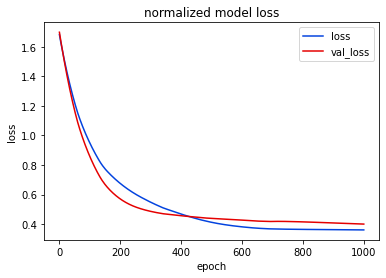

In [87]:
#plot training history
plt.plot(normed_history.history['loss'], color='xkcd:blue')
plt.plot(normed_history.history['val_loss'], color='xkcd:red')
plt.title('normalized model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

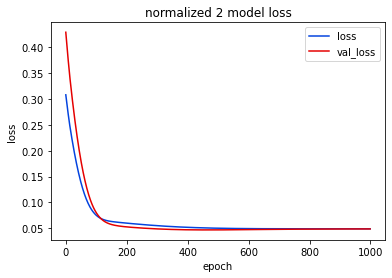

In [97]:
#plot training history
plt.plot(normed_history2.history['loss'], color='xkcd:blue')
plt.plot(normed_history2.history['val_loss'], color='xkcd:red')
plt.title('normalized 2 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

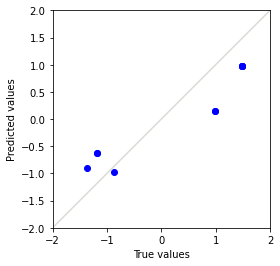

In [88]:
#predict values using data in the test set
y_pred_norm = normed_model.predict(normed_test_feature, batch_size=10).flatten()
a = plt.axes(aspect='equal')
plt.scatter(normed_test_labels, y_pred_norm, color='blue')
_ = plt.plot([-2,2], [-2,2], color='xkcd:light grey')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

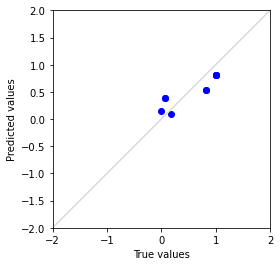

In [98]:
#predict values using data in the test set
y_pred_norm2 = normed_model2.predict(normed_test_feature2, batch_size=10).flatten()
a = plt.axes(aspect='equal')
plt.scatter(normed_test_labels2, y_pred_norm2, color='blue')
_ = plt.plot([-2,2], [-2,2], color='xkcd:light grey')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

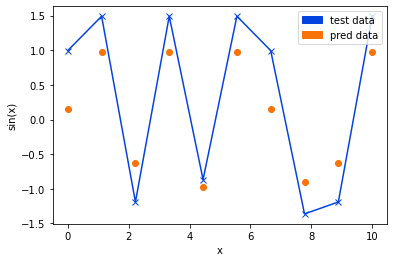

In [89]:
#Visualize the predicted value versus the training (ie. true) values.
plot_test_norm = plt.plot(t_range,normed_test_labels,'x-', color='xkcd:blue', label='y_test')
plot_pred = plt.plot(t_range,y_pred_norm,'o', color='xkcd:orange', label='y_pred')
plt.xlabel('x')
plt.ylabel('sin(x)')
test_patch_norm = mpatches.Patch(color='xkcd:blue', label='test data')
pred_patch_norm = mpatches.Patch(color='xkcd:orange', label='pred data')
plt.legend(handles = [test_patch_norm, pred_patch_norm])
plt.show()

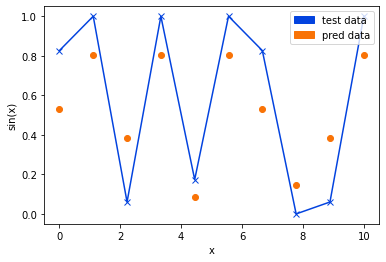

In [99]:
#Visualize the predicted value versus the training (ie. true) values.
plot_test_norm2 = plt.plot(t_range,normed_test_labels2,'x-', color='xkcd:blue', label='y_test')
plot_pred2 = plt.plot(t_range,y_pred_norm2,'o', color='xkcd:orange', label='y_pred')
plt.xlabel('x')
plt.ylabel('sin(x)')
test_patch_norm2 = mpatches.Patch(color='xkcd:blue', label='test data')
pred_patch_norm2 = mpatches.Patch(color='xkcd:orange', label='pred data')
plt.legend(handles = [test_patch_norm2, pred_patch_norm2])
plt.show()

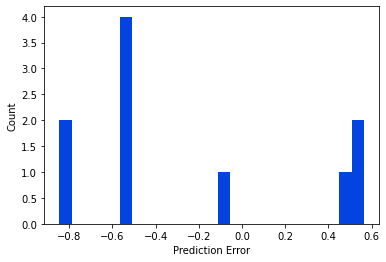

In [90]:
#Take a look at the error distribution.
error_norm = y_pred_norm - normed_test_labels
plt.hist(error_norm, bins = 25, color='xkcd:blue')
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

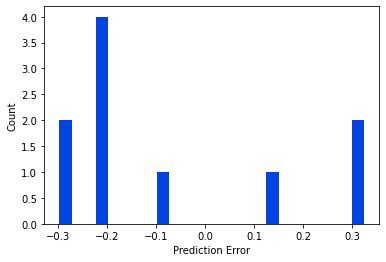

In [100]:
#Take a look at the error distribution.
error_norm2 = y_pred_norm2 - normed_test_labels2
plt.hist(error_norm2, bins = 25, color='xkcd:blue')
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")